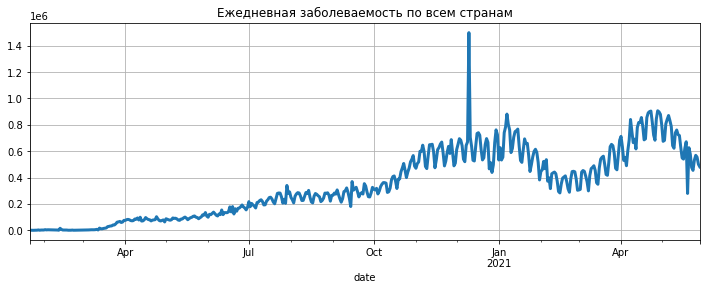

In [32]:
import pandas as pd
import matplotlib as plt
covid_data=pd.read_csv('data/covid_data.csv')
vaccinations_data = pd.read_csv('data/country_vaccinations.csv')
vaccinations_data = vaccinations_data[
    ['country', 'date', 'total_vaccinations', 
     'people_vaccinated', 'people_vaccinated_per_hundred',
     'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
     'daily_vaccinations', 'vaccines']]

covid_data=covid_data.groupby(['date','country'],as_index=False)[['confirmed','deaths','recovered']].sum()
covid_data['date'] = pd.to_datetime(covid_data['date'])
covid_data['active']=covid_data['confirmed']-covid_data['deaths']-covid_data['recovered']
covid_data=covid_data.sort_values(by=['country','date'])
covid_data['daily_confirmed'] = covid_data.groupby('country')['confirmed'].diff()
covid_data['daily_deaths'] = covid_data.groupby('country')['deaths'].diff()
covid_data['daily_recovered'] = covid_data.groupby('country')['recovered'].diff()
vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])
covid_df=covid_data.merge(vaccinations_data,on=['date','country'],how='left')
covid_df['death_rate']=covid_df['deaths']/covid_df['confirmed']*100
covid_df['recover_rate']=covid_df['recovered']/covid_df['confirmed']*100

grouped_cases = covid_df.groupby('date')['daily_confirmed'].sum()
grouped_cases.plot(
    kind='line',
    figsize=(12, 4),
    title='Ежедневная заболеваемость по всем странам',
    grid = True,
    lw=3
);


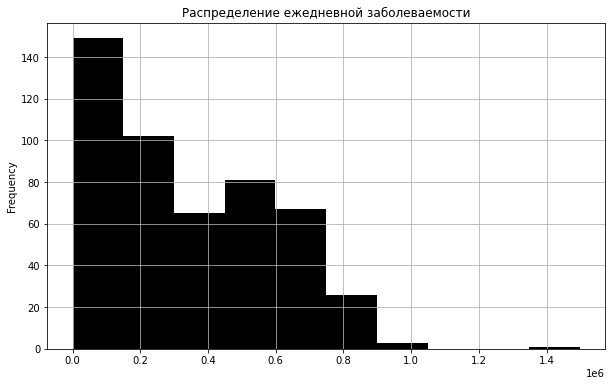

In [35]:
import pandas as pd
import matplotlib as plt
covid_data=pd.read_csv('data/covid_data.csv')
vaccinations_data = pd.read_csv('data/country_vaccinations.csv')
vaccinations_data = vaccinations_data[
    ['country', 'date', 'total_vaccinations', 
     'people_vaccinated', 'people_vaccinated_per_hundred',
     'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
     'daily_vaccinations', 'vaccines']]

covid_data=covid_data.groupby(['date','country'],as_index=False)[['confirmed','deaths','recovered']].sum()
covid_data['date'] = pd.to_datetime(covid_data['date'])
covid_data['active']=covid_data['confirmed']-covid_data['deaths']-covid_data['recovered']
covid_data=covid_data.sort_values(by=['country','date'])
covid_data['daily_confirmed'] = covid_data.groupby('country')['confirmed'].diff()
covid_data['daily_deaths'] = covid_data.groupby('country')['deaths'].diff()
covid_data['daily_recovered'] = covid_data.groupby('country')['recovered'].diff()
vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])
covid_df=covid_data.merge(vaccinations_data,on=['date','country'],how='left')
covid_df['death_rate']=covid_df['deaths']/covid_df['confirmed']*100
covid_df['recover_rate']=covid_df['recovered']/covid_df['confirmed']*100

grouped_cases.plot(
    kind='hist',
    figsize=(10, 6),
    title='Распределение ежедневной заболеваемости',
    grid = True,
    color = 'black',
    bins=10
);

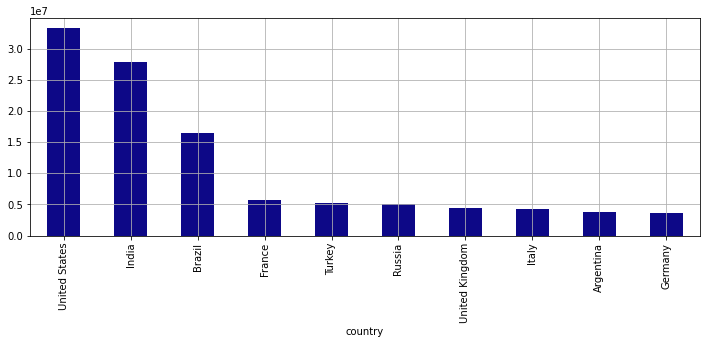

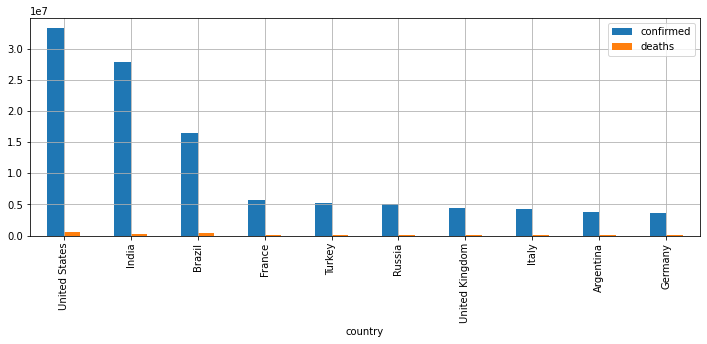

In [37]:
import pandas as pd
import matplotlib as plt
covid_data=pd.read_csv('data/covid_data.csv')
vaccinations_data = pd.read_csv('data/country_vaccinations.csv')
vaccinations_data = vaccinations_data[
    ['country', 'date', 'total_vaccinations', 
     'people_vaccinated', 'people_vaccinated_per_hundred',
     'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
     'daily_vaccinations', 'vaccines']]

covid_data=covid_data.groupby(['date','country'],as_index=False)[['confirmed','deaths','recovered']].sum()
covid_data['date'] = pd.to_datetime(covid_data['date'])
covid_data['active']=covid_data['confirmed']-covid_data['deaths']-covid_data['recovered']
covid_data=covid_data.sort_values(by=['country','date'])
covid_data['daily_confirmed'] = covid_data.groupby('country')['confirmed'].diff()
covid_data['daily_deaths'] = covid_data.groupby('country')['deaths'].diff()
covid_data['daily_recovered'] = covid_data.groupby('country')['recovered'].diff()
vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])
covid_df=covid_data.merge(vaccinations_data,on=['date','country'],how='left')
covid_df['death_rate']=covid_df['deaths']/covid_df['confirmed']*100
covid_df['recover_rate']=covid_df['recovered']/covid_df['confirmed']*100

grouped_country = covid_df.groupby(['country'])['confirmed'].last()
grouped_country = grouped_country.nlargest(10)
grouped_country.plot(
    kind='bar',
    grid=True,
    figsize=(12, 4),
    colormap='plasma'
);

grouped_country = covid_df.groupby(['country'])[['confirmed', 'deaths']].last()
grouped_country = grouped_country.nlargest(10, columns=['confirmed'])
grouped_country.plot( 
    kind='bar', 
    grid=True, 
    figsize=(12, 4), 
);



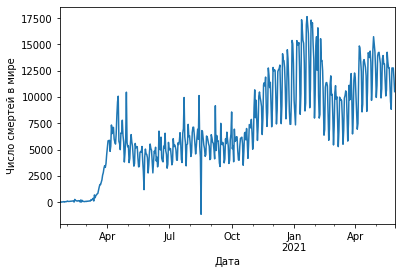

In [43]:
# 4.3
import pandas as pd
import matplotlib as plt
covid_data=pd.read_csv('data/covid_data.csv')
vaccinations_data = pd.read_csv('data/country_vaccinations.csv')
vaccinations_data = vaccinations_data[
    ['country', 'date', 'total_vaccinations', 
     'people_vaccinated', 'people_vaccinated_per_hundred',
     'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
     'daily_vaccinations', 'vaccines']]

covid_data=covid_data.groupby(['date','country'],as_index=False)[['confirmed','deaths','recovered']].sum()
covid_data['date'] = pd.to_datetime(covid_data['date'])
covid_data['active']=covid_data['confirmed']-covid_data['deaths']-covid_data['recovered']
covid_data=covid_data.sort_values(by=['country','date'])
covid_data['daily_confirmed'] = covid_data.groupby('country')['confirmed'].diff()
covid_data['daily_deaths'] = covid_data.groupby('country')['deaths'].diff()
covid_data['daily_recovered'] = covid_data.groupby('country')['recovered'].diff()
vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])
covid_df=covid_data.merge(vaccinations_data,on=['date','country'],how='left')
covid_df['death_rate']=covid_df['deaths']/covid_df['confirmed']*100
covid_df['recover_rate']=covid_df['recovered']/covid_df['confirmed']*100

grouped_cases = covid_df.groupby('date')['daily_deaths'].sum()
grouped_cases.plot(kind='line',xlabel='Дата', ylabel='Число смертей в мире');   # № 4

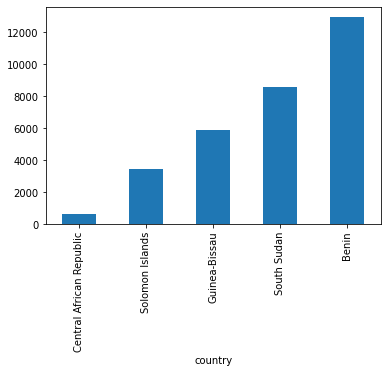

In [45]:
# 4.4 - 4.5
import pandas as pd
import matplotlib as plt

covid_data=pd.read_csv('data/covid_data.csv')
vaccinations_data = pd.read_csv('data/country_vaccinations.csv')
vaccinations_data = vaccinations_data[
    ['country', 'date', 'total_vaccinations', 
     'people_vaccinated', 'people_vaccinated_per_hundred',
     'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
     'daily_vaccinations', 'vaccines']]

covid_data=covid_data.groupby(['date','country'],as_index=False)[['confirmed','deaths','recovered']].sum()
covid_data['date'] = pd.to_datetime(covid_data['date'])
covid_data['active']=covid_data['confirmed']-covid_data['deaths']-covid_data['recovered']
covid_data=covid_data.sort_values(by=['country','date'])
covid_data['daily_confirmed'] = covid_data.groupby('country')['confirmed'].diff()
covid_data['daily_deaths'] = covid_data.groupby('country')['deaths'].diff()
covid_data['daily_recovered'] = covid_data.groupby('country')['recovered'].diff()
vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])
covid_df=covid_data.merge(vaccinations_data,on=['date','country'],how='left')
covid_df['death_rate']=covid_df['deaths']/covid_df['confirmed']*100
covid_df['recover_rate']=covid_df['recovered']/covid_df['confirmed']*100

covid_df.groupby(['country'])['total_vaccinations'].last().nsmallest(5).plot(kind='bar'); # № 1